**OBJECTIVE**:  THE OBJECTIVE OF THIS EXRECISE IS TO APPLY DIFFERENT CNN ARCHITECTURES ON THE DATASET AND OBSERVE THE PERFORMANCE

In [ ]:
# Importing the required libraries

from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import he_normal

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [ ]:
# We want our plots to be updated dynamically hence, we will create a function for the same

%matplotlib inline
%matplotlib notebook

# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import time

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# Setting the model parameters

batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
# Importing the data and storing the input image dimensions

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Deciding the input data format

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# Normalizing the data and looking at the data dimensions

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Converting the class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# We will build our first architecture using 3X3 kernels having three concolution layers

#Start Neural Network
model = Sequential()

#convolution 1st layer
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation='relu',
                 input_shape=input_shape)) 
model.add(BatchNormalization())
model.add(Dropout(0.25))
#model.add(MaxPooling2D())

#convolution 2nd layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D()) # default 2 x 2
model.add(Dropout(0.25))

#convolution 3rd layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D()) # default 2 x 2
model.add(Dropout(0.25))

#Fully connected 1st layer
model.add(Flatten()) 
model.add(Dense(128,activation = 'relu')) 
model.add(Dropout(0.25))      

#Fully connected final layer
model.add(Dense(10, activation = 'softmax')) 


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

#Save Model=ON
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

#print loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
__________

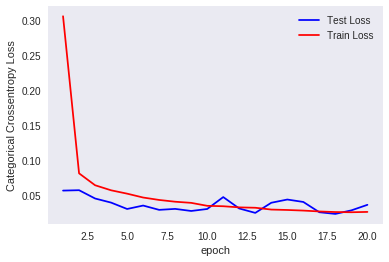

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# From the figure below we can see that the model has learnt the train data as well as the test data very well.


In [ ]:
# We will build our second architecture using 5X5 kernels having five convolution layers

#Start Neural Network
model1 = Sequential()

#convolution 1st layer
model1.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation='relu',
                 input_shape=input_shape)) 
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
#model.add(MaxPooling2D())

#convolution 2nd layer
model1.add(Conv2D(32, kernel_size=(5, 5), activation='relu',border_mode="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D()) # default 2 x 2
model1.add(Dropout(0.25))

#convolution 3rd layer
model1.add(Conv2D(64, kernel_size=(5, 5), activation='relu',border_mode="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D()) # default 2 x 2
#model1.add(Dropout(0.25))

#convolution 4th layer
model1.add(Conv2D(64, kernel_size=(5, 5), activation='relu',border_mode="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D()) # default 2 x 2
model1.add(Dropout(0.25))

#convolution 5th layer
model1.add(Conv2D(64, kernel_size=(5, 5), activation='relu',border_mode="same"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D()) # default 2 x 2
model1.add(Dropout(0.25))

#Fully connected 1st layer
model1.add(Flatten()) 
model1.add(Dense(128,activation = 'relu')) 
model1.add(Dropout(0.25))      

#Fully connected final layer
model1.add(Dense(10, activation = 'softmax')) 


model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model1.summary()

#Save Model=ON
history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model1.evaluate(x_test, y_test, verbose=0)

#print loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(5, 5), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(5, 5), activation="relu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
__________

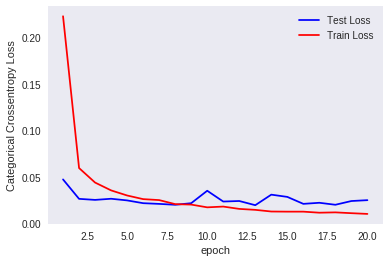

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# From the figure below we can see that the model has learnt the train data as well as the test data very well.

In [ ]:
# We will build our third architecture using 2X2 kernels having seven convolution layers

#Start Neural Network
model2 = Sequential()

#convolution 1st layer
model2.add(Conv2D(32, kernel_size=(7, 7), padding="same",
                 activation='relu',
                 input_shape=input_shape)) 
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
#model.add(MaxPooling2D())

#convolution 2nd layer
model2.add(Conv2D(32, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
model2.add(Dropout(0.25))

#convolution 3rd layer
model2.add(Conv2D(32, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
#model1.add(Dropout(0.25))

#convolution 4th layer
model2.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
model2.add(Dropout(0.25))

#convolution 5th layer
model2.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
#model2.add(Dropout(0.25))

#convolution 6th layer
model2.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
model2.add(Dropout(0.25))

#convolution 7th layer
model2.add(Conv2D(64, kernel_size=(7, 7), activation='relu',padding="same"))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2))) # default 2 x 2
#model2.add(Dropout(0.25))

#Fully connected 1st layer
model2.add(Flatten()) 
model2.add(Dense(128,activation = 'relu')) 
model2.add(Dropout(0.25))      

#Fully connected final layer
model2.add(Dense(10, activation = 'softmax')) 


model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model2.summary()

#Save Model=ON
history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model2.evaluate(x_test, y_test, verbose=0)

#print loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        50208     
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
__________

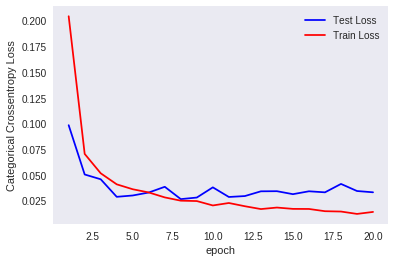

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# From the figure below we can see that the model has learnt the train data as well as the test data very well.

In [ ]:
# We will store the results in a single table to get 

import prettytable
from prettytable import PrettyTable

list1 = ['CNN w/ 3 convolution layers ','CNN w/ 5 convolution layers','CNN w/ 7 convolution layers']
list2 = ['0.036','0.025','0.032']
list3 = ['99.35%','99.52%','99.42%']


print('The scores for the different CNN architectures are:')
table = PrettyTable(['CNN Architecture','Multi-Class log loss','Accuracy'])
for x in range(0,3):
    table.add_row([list1[x],list2[x],list3[x]])
                                       
print(table) 

The scores for the different CNN architectures are:
+------------------------------+----------------------+----------+
|       CNN Architecture       | Multi-Class log loss | Accuracy |
+------------------------------+----------------------+----------+
| CNN w/ 3 convolution layers  |        0.036         |  99.35%  |
| CNN w/ 5 convolution layers  |        0.025         |  99.52%  |
| CNN w/ 7 convolution layers  |        0.032         |  99.42%  |
+------------------------------+----------------------+----------+


**OBSERVATION:**  From our plots of train and test sets we can observe that for all the architectures, beyond 10 epochs the model performance on the test data reduces by a small margin.  The model performance increases for our 5 layered CNN architecture but, it drops as we increase the number of convolution layers from 5 to7.

**CONCLUSION:** Of the 12 different architectures that we have tried we are getting the minimum multiclass log loss and maximum accuracy for CNN having 5 convolution layers with batch normalization and alternate dropouts.